In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
np.set_printoptions(suppress=False)

In [2]:
df = pd.read_excel("CHURNDATA.xlsx")

In [3]:
df.drop(columns = ["CIF", "CUS_DOB"], axis=1, inplace = True)

In [4]:
df

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,345,1459126.64,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,45,35372.55,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,8,28248.85,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,0,0.00,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,12,69083.38,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,68,4500.00,MALE,SINGLE,2005-07-25,14,13,12,1,3069.60,...,0.00,0.00,5645.60,26,0.00,0,26,2223,LOW,CHURN
1245,35,3500000.00,MALE,SINGLE,2005-07-27,14,55,35,37,119297.02,...,119137.62,440891.65,385735.90,127,674630.41,22,149,2222,MIDLE,ACTIVE
1246,34,1000.00,MALE,SINGLE,2005-07-25,14,415,368,424,1068684.72,...,733658.65,971555.27,2473621.68,1207,2641348.01,217,1424,2232,MIDLE,ACTIVE
1247,69,2000000.00,MALE,SINGLE,2005-07-26,14,147,202,234,397602.73,...,532708.75,400814.60,1371852.22,583,1310768.35,48,631,2222,MIDLE,ACTIVE


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   AGE                                 1249 non-null   int64         
 1   CUS_Month_Income                    1238 non-null   float64       
 2   CUS_Gender                          1247 non-null   object        
 3   CUS_Marital_Status                  1249 non-null   object        
 4   CUS_Customer_Since                  1249 non-null   datetime64[ns]
 5   YEARS_WITH_US                       1249 non-null   int64         
 6   # total debit transactions for S1   1249 non-null   int64         
 7   # total debit transactions for S2   1249 non-null   int64         
 8   # total debit transactions for S3   1249 non-null   int64         
 9   total debit amount for S1           1249 non-null   float64       
 10  total debit amount for S

In [6]:
df.describe()

,AGE,CUS_Month_Income,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,total debit amount for S3,# total credit transactions for S1,...,# total credit transactions for S3,total credit amount for S1,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target
count,1249.000000,1.238000e+03,1249.000000,1249.000000,1249.000000,1249.000000,1.249000e+03,1.249000e+03,1.249000e+03,1249.000000,...,1249.000000,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1249.000000,1.249000e+03,1249.000000,1249.000000,1249.000000
mean,46.746998,2.764869e+06,14.116894,54.262610,55.680544,56.966373,3.147439e+05,3.090418e+05,3.061457e+05,7.613291,...,8.675741,3.089540e+05,3.173819e+05,3.020052e+05,9.299314e+05,166.909528,9.283411e+05,24.559648,191.469175,2222.296237
std,12.315109,5.406761e+06,2.279882,80.732325,81.020146,84.649516,1.513433e+06,1.293928e+06,9.385775e+05,13.543207,...,14.087572,1.631418e+06,1.048443e+06,1.273680e+06,3.142967e+06,235.386076,3.685585e+06,38.467079,263.353988,3.314255
min,14.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,2211.000000
25%,39.000000,7.568750e+03,14.000000,7.000000,6.000000,6.000000,1.155000e+04,1.122578e+04,7.085000e+03,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,5.642350e+04,26.000000,1.511744e+04,2.000000,33.000000,2222.000000
50%,46.000000,1.500000e+06,14.000000,22.000000,24.000000,24.000000,5.395632e+04,6.158130e+04,5.907391e+04,6.000000,...,6.000000,4.522084e+04,4.679082e+04,4.952000e+04,2.031400e+05,74.000000,1.525319e+05,18.000000,90.000000,2223.000000
75%,55.000000,3.000000e+06,14.000000,65.000000,65.000000,68.000000,1.892775e+05,2.096500e+05,2.250619e+05,8.000000,...,10.000000,1.720000e+05,1.872971e+05,1.950319e+05,6.613808e+05,196.000000,5.853255e+05,28.000000,227.000000,2223.000000
max,119.000000,8.000000e+07,28.000000,715.000000,547.000000,757.000000,3.573349e+07,3.723382e+07,1.866511e+07,189.000000,...,169.000000,4.920688e+07,1.753799e+07,3.764708e+07,6.997262e+07,1859.000000,1.043919e+08,429.000000,2174.000000,2236.000000


In [7]:
#Finding Null
df.isna().sum()

AGE                                    0
CUS_Month_Income                      11
CUS_Gender                             2
CUS_Marital_Status                     0
CUS_Customer_Since                     0
YEARS_WITH_US                          0
# total debit transactions for S1      0
# total debit transactions for S2      0
# total debit transactions for S3      0
total debit amount for S1              0
total debit amount for S2              0
total debit amount for S3              0
# total credit transactions for S1     0
# total credit transactions for S2     0
# total credit transactions for S3     0
total credit amount for S1             0
total credit amount for S2             0
total credit amount for S3             0
total debit amount                     0
total debit transactions               0
total credit amount                    0
total credit transactions              0
total transactions                     0
CUS_Target                             0
TAR_Desc        

In [8]:
df[df['CUS_Month_Income'].isna()== True]

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
85,62,NaN,FEMALE,SINGLE,1996-05-07,23,21,17,9,41893.60,...,0.00,0.00,82043.30,47,0.00,0,47,2223,LOW,ACTIVE
99,66,NaN,FEMALE,MARRIED,1998-01-20,21,11,25,22,28500.00,...,24294.55,26893.50,101900.00,58,75482.60,32,90,2223,LOW,ACTIVE
184,119,NaN,NaN,MARRIED,1998-01-20,21,4,4,1,2899.60,...,2000.00,0.00,18649.30,9,2000.00,1,10,2223,LOW,CHURN
316,44,NaN,MALE,SINGLE,2005-05-26,14,0,2,0,0.00,...,0.00,0.00,1000.00,2,0.00,0,2,2222,MIDLE,CHURN
368,43,NaN,MALE,SINGLE,2005-06-07,14,22,56,23,63671.14,...,125400.78,41800.26,229406.14,101,250801.56,12,113,2222,MIDLE,ACTIVE
400,56,NaN,MALE,SINGLE,1995-03-17,24,26,20,0,255579.65,...,0.00,0.00,297687.54,46,0.00,0,46,2222,MIDLE,CHURN
427,56,NaN,MALE,SINGLE,1991-11-09,28,9,14,2,6545.00,...,18550.72,0.00,26745.00,25,18550.72,1,26,2223,LOW,ACTIVE
857,58,NaN,FEMALE,SINGLE,1997-01-13,22,37,68,47,60103.25,...,80679.78,180922.70,276279.95,152,261602.48,8,160,2223,LOW,ACTIVE
938,43,NaN,FEMALE,MARRIED,1996-07-25,23,6,6,9,2882.52,...,0.00,2900.00,9751.20,21,2900.00,1,22,2222,MIDLE,ACTIVE
996,119,NaN,NaN,SINGLE,1998-01-07,21,27,0,0,43318.00,...,0.00,0.00,43318.00,27,39250.86,5,32,2233,LOW,CHURN


In [9]:
df[df['CUS_Gender'].isna()== True]['Status']

184    CHURN
996    CHURN
Name: Status, dtype: object

In [10]:
df[df['CUS_Month_Income'].isna()== True][df['CUS_Gender'].isna()== True]['Status']

184    CHURN
996    CHURN
Name: Status, dtype: object

In [11]:
df.dropna(inplace=True)

In [12]:
dict_name = {
    '# total debit transactions for S1': "S1_total_debit_transactions",
    '# total debit transactions for S2': "S2_total_debit_transactions",
    '# total debit transactions for S3': "S3_total_debit_transactions",
    'total debit amount for S1': 'S1_total_debit',
    'total debit amount for S2': 'S2_total_debit',
    'total debit amount for S3': 'S3_total_debit',
    '# total credit transactions for S1': "S1_total_credit_transactions",
    '# total credit transactions for S2': "S2_total_credit_transactions",
    '# total credit transactions for S3': "S3_total_credit_transactions",
    'total credit amount for S1': 'S1_total_credit',
    'total credit amount for S2': 'S2_total_credit',
    'total credit amount for S3': 'S3_total_credit'
}

In [13]:
df.rename(columns = dict_name, inplace = True)

In [14]:
df

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,S1_total_debit_transactions,S2_total_debit_transactions,S3_total_debit_transactions,S1_total_debit,...,S2_total_credit,S3_total_credit,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,345,1459126.64,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,45,35372.55,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,8,28248.85,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,0,0.00,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,12,69083.38,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,68,4500.00,MALE,SINGLE,2005-07-25,14,13,12,1,3069.60,...,0.00,0.00,5645.60,26,0.00,0,26,2223,LOW,CHURN
1245,35,3500000.00,MALE,SINGLE,2005-07-27,14,55,35,37,119297.02,...,119137.62,440891.65,385735.90,127,674630.41,22,149,2222,MIDLE,ACTIVE
1246,34,1000.00,MALE,SINGLE,2005-07-25,14,415,368,424,1068684.72,...,733658.65,971555.27,2473621.68,1207,2641348.01,217,1424,2232,MIDLE,ACTIVE
1247,69,2000000.00,MALE,SINGLE,2005-07-26,14,147,202,234,397602.73,...,532708.75,400814.60,1371852.22,583,1310768.35,48,631,2222,MIDLE,ACTIVE


In [15]:
df['Status'].value_counts()

ACTIVE    1015
CHURN      223
Name: Status, dtype: int64

In [16]:
(df['Status'].value_counts()[1]/df['Status'].value_counts()[0])*100

21.970443349753694

In [17]:
df_active = df[df['Status']=='ACTIVE']
df_churn = df[df['Status']=='CHURN']

In [18]:
from sklearn.utils import resample
churn_upsample = resample(df_churn, replace=True, n_samples = len(df_active), random_state = 42)

In [19]:
churn_upsample.shape

(1015, 26)

In [20]:
df_active.shape

(1015, 26)

In [21]:
df_upsample = pd.concat([df_active, churn_upsample])
df_upsample.reset_index(drop=True, inplace=True)

In [22]:
df_upsample['Status'].value_counts()

ACTIVE    1015
CHURN     1015
Name: Status, dtype: int64

In [23]:
lst_scale = []
lst_notscale = []
for i in df_upsample.columns:
    print(f"Unique Values in {i}:: {len(df_upsample[i].unique())}")
    if df_upsample[i].dtype != 'object' and i!= 'CUS_Customer_Since':
        if df_upsample[i].max() > 10000:
            lst_scale.append(i)
        else:
            lst_notscale.append(i)

Unique Values in AGE:: 71
Unique Values in CUS_Month_Income:: 278
Unique Values in CUS_Gender:: 2
Unique Values in CUS_Marital_Status:: 6
Unique Values in CUS_Customer_Since:: 207
Unique Values in YEARS_WITH_US:: 23
Unique Values in S1_total_debit_transactions:: 231
Unique Values in S2_total_debit_transactions:: 240
Unique Values in S3_total_debit_transactions:: 244
Unique Values in S1_total_debit:: 1087
Unique Values in S2_total_debit:: 1046
Unique Values in S3_total_debit:: 1026
Unique Values in S1_total_credit_transactions:: 62
Unique Values in S2_total_credit_transactions:: 68
Unique Values in S3_total_credit_transactions:: 69
Unique Values in S1_total_credit:: 831
Unique Values in S2_total_credit:: 840
Unique Values in S3_total_credit:: 831
Unique Values in total debit amount:: 1208
Unique Values in total debit transactions:: 434
Unique Values in total credit amount:: 994
Unique Values in total credit transactions:: 130
Unique Values in total transactions:: 464
Unique Values in CU

In [24]:
df_test1 = pd.concat([df_upsample[lst_scale],df_upsample[['CUS_Target','TAR_Desc','Status']]], axis=1)

In [25]:
df_test1

,CUS_Month_Income,S1_total_debit,S2_total_debit,S3_total_debit,S1_total_credit,S2_total_credit,S3_total_credit,total debit amount,total credit amount,CUS_Target,TAR_Desc,Status
0,7116.64,1459126.64,1230543.08,2068641.91,1516981.10,1764079.61,2378592.62,4758311.63,5659653.33,2231,EXECUTIVE,ACTIVE
1,1500000.00,35372.55,20134.00,83856.67,10000.00,19500.00,57500.00,139363.22,87000.00,2223,LOW,ACTIVE
2,5000000.00,28248.85,4777.66,4348.95,709625.00,240311.84,70946.86,37375.46,1020883.70,2222,MIDLE,ACTIVE
3,500.00,0.00,4000.00,0.00,30103.05,28089.99,18753.92,4000.00,76946.96,2223,LOW,ACTIVE
4,9000000.00,69083.38,223007.51,46379.40,195600.00,176000.00,70500.00,338470.29,442100.00,2223,LOW,ACTIVE
...,...,...,...,...,...,...,...,...,...,...,...,...
2025,2000000.00,44155.00,0.00,0.00,8500.00,0.00,0.00,44155.00,8500.00,2223,LOW,CHURN
2026,2000.00,0.00,0.00,19.50,0.00,0.00,0.00,19.50,0.00,2223,LOW,CHURN
2027,10000000.00,1817.02,0.00,883.32,0.00,1000.00,0.00,2700.34,1000.00,2222,MIDLE,CHURN
2028,2000.00,0.00,0.00,19.50,0.00,0.00,0.00,19.50,0.00,2223,LOW,CHURN


In [26]:
df_upsample

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,S1_total_debit_transactions,S2_total_debit_transactions,S3_total_debit_transactions,S1_total_debit,...,S2_total_credit,S3_total_credit,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,345,1459126.64,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,45,35372.55,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,8,28248.85,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,0,0.00,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,12,69083.38,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025,46,2000000.00,MALE,SINGLE,2005-07-19,14,19,0,0,44155.00,...,0.00,0.00,44155.00,19,8500.00,2,21,2223,LOW,CHURN
2026,52,2000.00,FEMALE,MARRIED,2005-11-25,14,0,0,1,0.00,...,0.00,0.00,19.50,1,0.00,0,1,2223,LOW,CHURN
2027,53,10000000.00,MALE,SINGLE,2005-09-22,14,2,0,1,1817.02,...,1000.00,0.00,2700.34,3,1000.00,1,4,2222,MIDLE,CHURN
2028,52,2000.00,FEMALE,MARRIED,2005-11-25,14,0,0,1,0.00,...,0.00,0.00,19.50,1,0.00,0,1,2223,LOW,CHURN


In [27]:
df_upsample["category"] = np.where(df_upsample["total debit transactions"]>df_upsample["total credit transactions"], "debit", "credit")

In [28]:
df_upsample

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,S1_total_debit_transactions,S2_total_debit_transactions,S3_total_debit_transactions,S1_total_debit,...,S3_total_credit,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status,category
0,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,345,1459126.64,...,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE,debit
1,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,45,35372.55,...,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE,debit
2,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,8,28248.85,...,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE,debit
3,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,0,0.00,...,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE,credit
4,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,12,69083.38,...,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025,46,2000000.00,MALE,SINGLE,2005-07-19,14,19,0,0,44155.00,...,0.00,44155.00,19,8500.00,2,21,2223,LOW,CHURN,debit
2026,52,2000.00,FEMALE,MARRIED,2005-11-25,14,0,0,1,0.00,...,0.00,19.50,1,0.00,0,1,2223,LOW,CHURN,debit
2027,53,10000000.00,MALE,SINGLE,2005-09-22,14,2,0,1,1817.02,...,0.00,2700.34,3,1000.00,1,4,2222,MIDLE,CHURN,debit
2028,52,2000.00,FEMALE,MARRIED,2005-11-25,14,0,0,1,0.00,...,0.00,19.50,1,0.00,0,1,2223,LOW,CHURN,debit


In [29]:
recommend_in = []
for i,j in enumerate(df_upsample['category']):
    if j == 'debit':
        if max(df_upsample['S1_total_debit'][i],df_upsample['S2_total_debit'][i],df_upsample['S3_total_debit'][i]) == df_upsample['S1_total_debit'][i]:
            recommend_in.append("S1_debit")
        elif max(df_upsample['S1_total_debit'][i],df_upsample['S2_total_debit'][i],df_upsample['S3_total_debit'][i]) == df_upsample['S2_total_debit'][i]:
            recommend_in.append("S2_debit")
        elif max(df_upsample['S1_total_debit'][i],df_upsample['S2_total_debit'][i],df_upsample['S3_total_debit'][i]) == df_upsample['S3_total_debit'][i]:
            recommend_in.append("S3_debit")
        else:
            recommend_in.append("NI_debit")
    elif j == 'credit':
        if max(df_upsample['S1_total_credit'][i],df_upsample['S2_total_credit'][i],df_upsample['S3_total_credit'][i]) == df_upsample['S1_total_credit'][i]:
            recommend_in.append("S1_credit")
        elif max(df_upsample['S1_total_credit'][i],df_upsample['S2_total_credit'][i],df_upsample['S3_total_credit'][i]) == df_upsample['S2_total_credit'][i]:
            recommend_in.append("S2_credit")
        elif max(df_upsample['S1_total_credit'][i],df_upsample['S2_total_credit'][i],df_upsample['S3_total_credit'][i]) == df_upsample['S3_total_credit'][i]:
            recommend_in.append("S3_credit")
        else:
            recommend_in.append("NI_credit")
print(recommend_in)

['S3_debit', 'S3_debit', 'S1_debit', 'S1_credit', 'S2_debit', 'S1_debit', 'S1_debit', 'S2_debit', 'S3_debit', 'S3_debit', 'S1_debit', 'S3_debit', 'S1_debit', 'S2_debit', 'S3_debit', 'S3_debit', 'S2_debit', 'S2_debit', 'S1_debit', 'S3_debit', 'S1_debit', 'S2_debit', 'S2_debit', 'S3_debit', 'S3_debit', 'S2_debit', 'S2_debit', 'S3_debit', 'S3_debit', 'S3_debit', 'S2_debit', 'S2_debit', 'S3_debit', 'S1_debit', 'S1_debit', 'S3_debit', 'S2_debit', 'S3_debit', 'S3_debit', 'S2_debit', 'S1_debit', 'S3_debit', 'S2_debit', 'S1_debit', 'S3_debit', 'S2_debit', 'S1_debit', 'S2_debit', 'S3_debit', 'S3_debit', 'S3_debit', 'S3_debit', 'S3_debit', 'S2_debit', 'S2_debit', 'S3_debit', 'S3_debit', 'S1_debit', 'S1_debit', 'S1_debit', 'S3_debit', 'S1_debit', 'S1_debit', 'S1_debit', 'S3_debit', 'S1_debit', 'S2_debit', 'S3_debit', 'S2_debit', 'S1_debit', 'S3_debit', 'S2_debit', 'S3_debit', 'S2_debit', 'S3_debit', 'S1_debit', 'S1_debit', 'S1_debit', 'S1_debit', 'S2_debit', 'S3_debit', 'S2_debit', 'S3_debit', 'S

In [30]:
df_upsample["Suggestions"] = recommend_in

In [31]:
df_upsample.columns

Index(['AGE', 'CUS_Month_Income', 'CUS_Gender', 'CUS_Marital_Status',
       'CUS_Customer_Since', 'YEARS_WITH_US', 'S1_total_debit_transactions',
       'S2_total_debit_transactions', 'S3_total_debit_transactions',
       'S1_total_debit', 'S2_total_debit', 'S3_total_debit',
       'S1_total_credit_transactions', 'S2_total_credit_transactions',
       'S3_total_credit_transactions', 'S1_total_credit', 'S2_total_credit',
       'S3_total_credit', 'total debit amount', 'total debit transactions',
       'total credit amount', 'total credit transactions',
       'total transactions', 'CUS_Target', 'TAR_Desc', 'Status', 'category',
       'Suggestions'],
      dtype='object')

In [32]:
#Analysis

In [33]:
pd.crosstab(index= df_upsample['Status'], columns = df_upsample['CUS_Gender'])

CUS_Gender,FEMALE,MALE
Status,,
ACTIVE,429,586
CHURN,332,683


In [34]:
pd.crosstab(index= df_upsample['Status'], columns = df_upsample['CUS_Marital_Status'])

CUS_Marital_Status,DIVORCE,MARRIED,OTHER,PARTNER,SINGLE,WIDOWED
Status,,,,,,
ACTIVE,28,279,1,1,697,9
CHURN,9,190,0,0,809,7


In [35]:
pd.crosstab(index= df_upsample['Status'], columns = df_upsample['category'])

category,credit,debit
Status,,
ACTIVE,34,981
CHURN,122,893


In [36]:
def count_all(col):
    sns.countplot(x= df_upsample[col], hue=df_upsample['Status'])
    plt.xticks(rotation= 75)
    x = pd.crosstab(index= df_upsample['Status'], columns = df_upsample[col])
    return x

CUS_Gender,FEMALE,MALE
Status,,
ACTIVE,429,586
CHURN,332,683


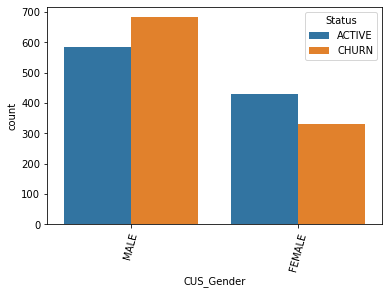

In [37]:
count_all('CUS_Gender')

CUS_Marital_Status,DIVORCE,MARRIED,OTHER,PARTNER,SINGLE,WIDOWED
Status,,,,,,
ACTIVE,28,279,1,1,697,9
CHURN,9,190,0,0,809,7


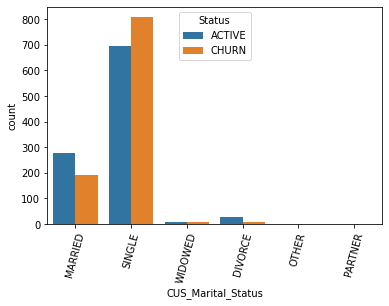

In [38]:
count_all('CUS_Marital_Status')

category,credit,debit
Status,,
ACTIVE,34,981
CHURN,122,893


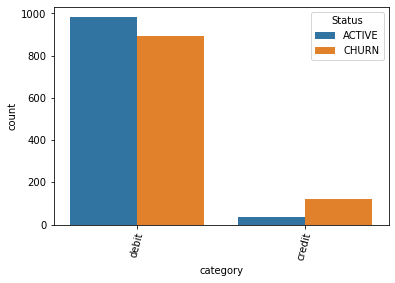

In [39]:
count_all('category')

TAR_Desc,EXECUTIVE,LOW,MIDLE,PLATINUM
Status,,,,
ACTIVE,58,580,350,27
CHURN,2,732,259,22


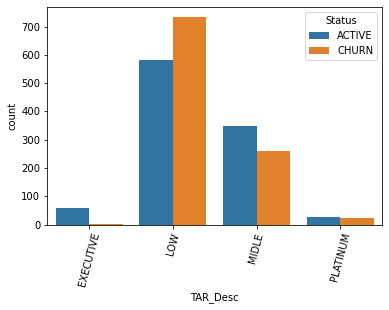

In [40]:
count_all('TAR_Desc')

CUS_Target,2211,2212,2222,2223,2224,2230,2231,2232,2233,2234,2235,2236
Status,,,,,,,,,,,,
ACTIVE,22,52,327,575,3,5,3,13,0,2,10,3
CHURN,15,2,259,727,0,7,0,0,5,0,0,0


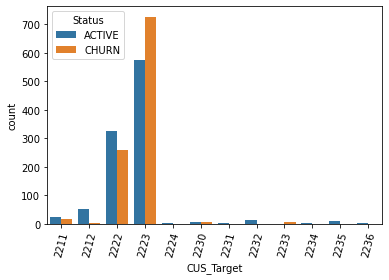

In [41]:
count_all('CUS_Target')

In [42]:
df_upsample.corr()

,AGE,CUS_Month_Income,YEARS_WITH_US,S1_total_debit_transactions,S2_total_debit_transactions,S3_total_debit_transactions,S1_total_debit,S2_total_debit,S3_total_debit,S1_total_credit_transactions,...,S3_total_credit_transactions,S1_total_credit,S2_total_credit,S3_total_credit,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target
AGE,1.000000,0.121913,0.110637,-0.035752,-0.039727,-0.031339,-0.007224,-0.008193,-0.003858,-0.021126,...,-0.030238,0.008814,0.003008,-0.010047,-0.008032,-0.037440,0.001331,-0.035569,-0.038615,-0.026757
CUS_Month_Income,0.121913,1.000000,-0.090198,0.224564,0.247388,0.050275,0.080285,0.170287,0.059323,0.234976,...,0.066174,0.051980,0.229332,0.017615,0.127014,0.182924,0.097377,0.210767,0.194300,0.052423
YEARS_WITH_US,0.110637,-0.090198,1.000000,0.055171,0.064592,0.110343,-0.000010,0.011665,-0.009864,0.087349,...,0.083008,0.021261,0.025030,0.025043,0.001924,0.080713,0.025392,0.085145,0.084535,0.092842
S1_total_debit_transactions,-0.035752,0.224564,0.055171,1.000000,0.904811,0.812758,0.344158,0.397375,0.456803,0.662096,...,0.571464,0.324373,0.473165,0.355550,0.466218,0.951502,0.405585,0.670830,0.945843,-0.070112
S2_total_debit_transactions,-0.039727,0.247388,0.064592,0.904811,1.000000,0.855248,0.332862,0.472923,0.468030,0.644503,...,0.605734,0.345646,0.556201,0.393476,0.495438,0.967422,0.452723,0.697964,0.964093,-0.063171
S3_total_debit_transactions,-0.031339,0.050275,0.110343,0.812758,0.855248,1.000000,0.305292,0.415012,0.559005,0.551443,...,0.686690,0.351680,0.484308,0.473286,0.484947,0.935123,0.461222,0.645122,0.927405,-0.079919
S1_total_debit,-0.007224,0.080285,-0.000010,0.344158,0.332862,0.305292,1.000000,0.641425,0.408688,0.193690,...,0.168400,0.612857,0.530487,0.486282,0.870262,0.344073,0.594198,0.196049,0.334937,-0.187486
S2_total_debit,-0.008193,0.170287,0.011665,0.397375,0.472923,0.415012,0.641425,1.000000,0.541568,0.275961,...,0.253238,0.876894,0.817443,0.857889,0.885083,0.450696,0.923147,0.303640,0.445866,-0.066837
S3_total_debit,-0.003858,0.059323,-0.009864,0.456803,0.468030,0.559005,0.408688,0.541568,1.000000,0.278624,...,0.355821,0.483976,0.546355,0.600692,0.717719,0.520017,0.581496,0.330131,0.511364,-0.231783
S1_total_credit_transactions,-0.021126,0.234976,0.087349,0.662096,0.644503,0.551443,0.193690,0.275961,0.278624,1.000000,...,0.724927,0.233295,0.365599,0.251339,0.290467,0.650799,0.297761,0.936620,0.719728,0.037709


In [43]:
df_upsample['Status'] = np.where(df_upsample['Status']=='ACTIVE', 0, 1)
df_upsample['category'] = np.where(df_upsample['category']=='debit', 0, 1)

In [44]:
df_upsample.to_csv('Upsample_Churn.csv')

In [45]:
df_upsample['Status']

0       0
1       0
2       0
3       0
4       0
       ..
2025    1
2026    1
2027    1
2028    1
2029    1
Name: Status, Length: 2030, dtype: int32

In [46]:
df_upsample.corr()['Status']

AGE                            -0.051684
CUS_Month_Income                0.045280
YEARS_WITH_US                  -0.026042
S1_total_debit_transactions    -0.338883
S2_total_debit_transactions    -0.366498
S3_total_debit_transactions    -0.436592
S1_total_debit                 -0.117353
S2_total_debit                 -0.141201
S3_total_debit                 -0.228420
S1_total_credit_transactions   -0.224196
S2_total_credit_transactions   -0.241284
S3_total_credit_transactions   -0.351386
S1_total_credit                -0.119531
S2_total_credit                -0.179723
S3_total_credit                -0.168665
total debit amount             -0.182803
total debit transactions       -0.400317
total credit amount            -0.163949
total credit transactions      -0.290783
total transactions             -0.399239
CUS_Target                      0.076655
Status                          1.000000
category                        0.162755
Name: Status, dtype: float64

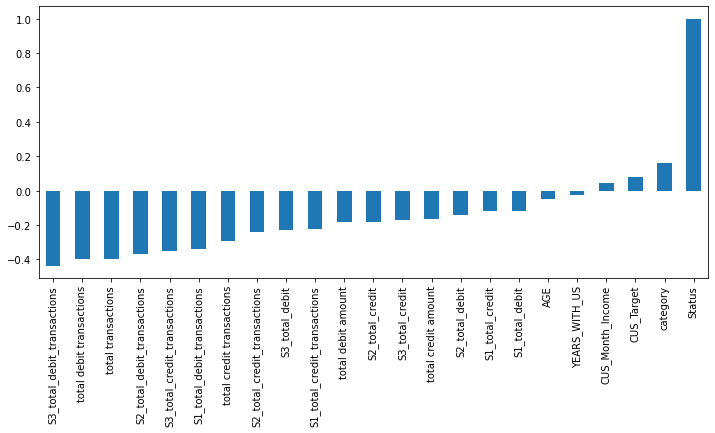

In [47]:
plt.figure(figsize = [12,5])
df_upsample.corr()['Status'].sort_values(ascending = True).plot(kind = 'bar')
plt.show()

In [48]:
def col_usage(col1,col2):
    lst=[]
    for i, j in zip(df_upsample[col1], df_upsample[col2]):
        if j==0:
            lst.append(0)
        else:
            x= round((i/j)*100,2)
            lst.append(x)
    return lst

In [49]:
df_upsample['S1_debit_usage'] = col_usage('S1_total_debit','total debit amount' )
df_upsample['S2_debit_usage'] = col_usage('S2_total_debit','total debit amount' )
df_upsample['S3_debit_usage'] = col_usage('S3_total_debit','total debit amount' )

df_upsample['S1_credit_usage'] = col_usage('S1_total_credit','total credit amount' )
df_upsample['S2_credit_usage'] = col_usage('S2_total_credit','total credit amount' )
df_upsample['S3_credit_usage'] = col_usage('S3_total_credit','total credit amount' )

In [50]:
df_upsample['S1_debit_rate'] = col_usage('S1_total_debit_transactions','total debit transactions' )
df_upsample['S2_debit_rate'] = col_usage('S2_total_debit_transactions','total debit transactions' )
df_upsample['S3_debit_rate'] = col_usage('S3_total_debit_transactions','total debit transactions' )

df_upsample['S1_credit_rate'] = col_usage('S1_total_credit_transactions','total credit transactions' )
df_upsample['S2_credit_rate'] = col_usage('S2_total_credit_transactions','total credit transactions' )
df_upsample['S3_credit_rate'] = col_usage('S3_total_credit_transactions','total credit transactions' )

In [51]:
df_upsample

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,S1_total_debit_transactions,S2_total_debit_transactions,S3_total_debit_transactions,S1_total_debit,...,S3_debit_usage,S1_credit_usage,S2_credit_usage,S3_credit_usage,S1_debit_rate,S2_debit_rate,S3_debit_rate,S1_credit_rate,S2_credit_rate,S3_credit_rate
0,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,345,1459126.64,...,43.47,26.80,31.17,42.03,31.23,29.88,38.90,15.38,36.92,47.69
1,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,45,35372.55,...,60.17,11.49,22.41,66.09,38.14,15.46,46.39,20.00,40.00,40.00
2,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,8,28248.85,...,11.64,69.51,23.54,6.95,58.49,26.42,15.09,51.85,29.63,18.52
3,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,0,0.00,...,0.00,39.12,36.51,24.37,0.00,100.00,0.00,41.67,33.33,25.00
4,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,12,69083.38,...,13.70,44.24,39.81,15.95,25.00,55.00,20.00,38.10,33.33,28.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025,46,2000000.00,MALE,SINGLE,2005-07-19,14,19,0,0,44155.00,...,0.00,100.00,0.00,0.00,100.00,0.00,0.00,100.00,0.00,0.00
2026,52,2000.00,FEMALE,MARRIED,2005-11-25,14,0,0,1,0.00,...,100.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00
2027,53,10000000.00,MALE,SINGLE,2005-09-22,14,2,0,1,1817.02,...,32.71,0.00,100.00,0.00,66.67,0.00,33.33,0.00,100.00,0.00
2028,52,2000.00,FEMALE,MARRIED,2005-11-25,14,0,0,1,0.00,...,100.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00


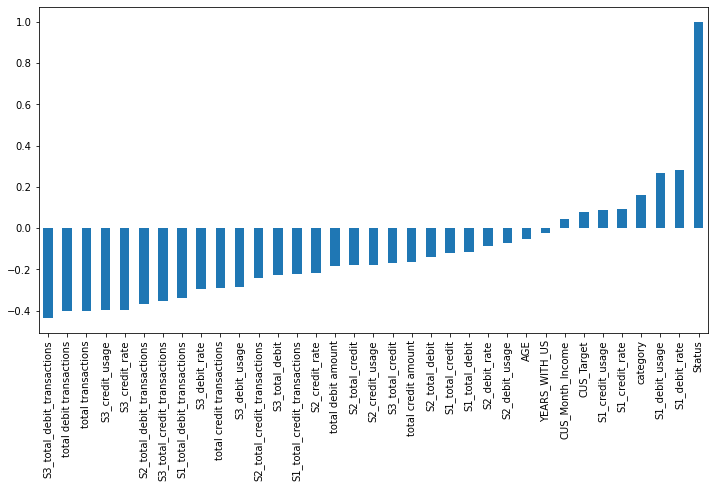

In [52]:
plt.figure(figsize = [12,6])
df_upsample.corr()['Status'].sort_values(ascending= True).plot(kind = 'bar')
plt.show()

<AxesSubplot:ylabel='Density'>

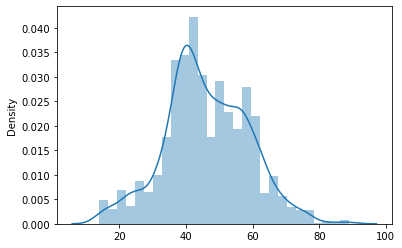

In [53]:
sns.distplot(x = df_upsample['AGE'])

<AxesSubplot:ylabel='Density'>

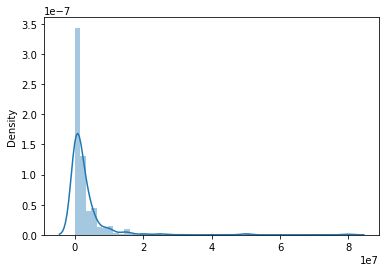

In [54]:
sns.distplot(x = df_upsample['CUS_Month_Income'])

<AxesSubplot:xlabel='AGE', ylabel='CUS_Month_Income'>

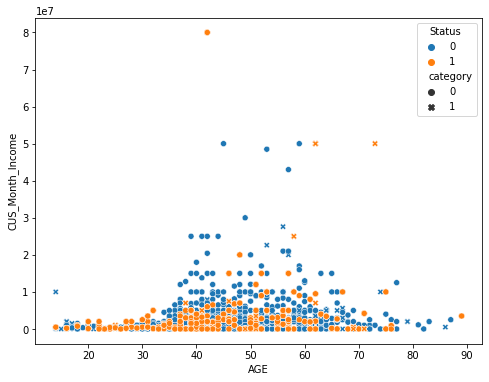

In [55]:
plt.figure(figsize = [8,6])
sns.scatterplot(x = 'AGE', y='CUS_Month_Income', hue='Status', style ='category',data=df_upsample)

In [56]:
df_churn0 = df_upsample[df_upsample['Status']==0]
df_churn1 = df_upsample[df_upsample['Status']==1]

In [57]:
#Now we'll proceed to bivariate analysis

In [58]:
def bi_analysis(df, col, title, hue=None):
    plt.figure(figsize=[12,8])
    sns.countplot(data = df, x= col, hue = hue)
    plt.title(title)
    plt.show()

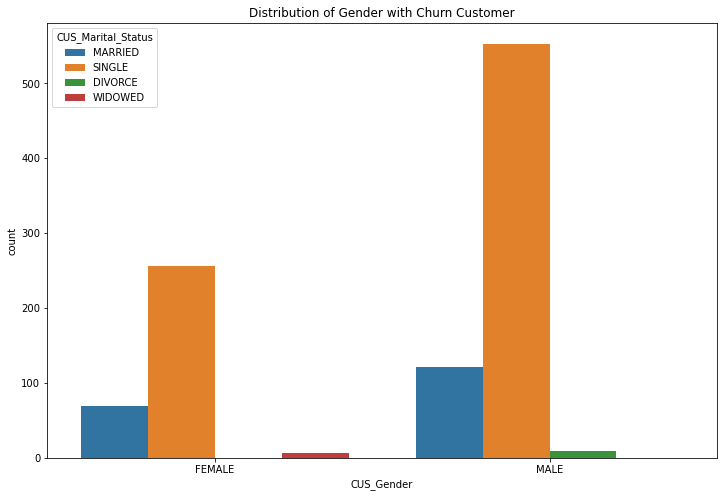

In [59]:
bi_analysis(df_churn1, 'CUS_Gender', 'Distribution of Gender with Churn Customer', hue = 'CUS_Marital_Status')


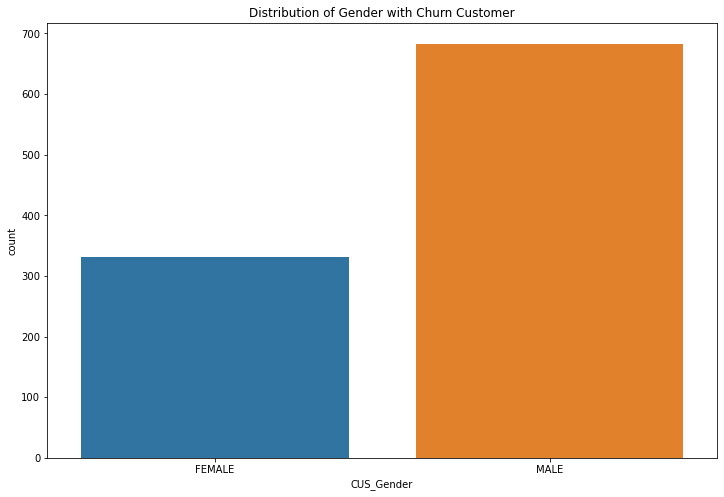

In [60]:
bi_analysis(df_churn1, 'CUS_Gender', 'Distribution of Gender with Churn Customer')

Text(0.5, 1.0, 'Year With Us vs Churn')

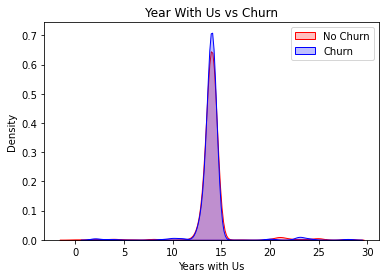

In [61]:
y_with = sns.kdeplot(df_churn0['YEARS_WITH_US'], color='Red', shade=True)
y_with = sns.kdeplot(df_churn1['YEARS_WITH_US'], ax = y_with, color='Blue', shade=True)
y_with.legend(["No Churn","Churn"],loc='upper right')
y_with.set_ylabel('Density')
y_with.set_xlabel('Years with Us')
y_with.set_title('Year With Us vs Churn')

<AxesSubplot:ylabel='Density'>

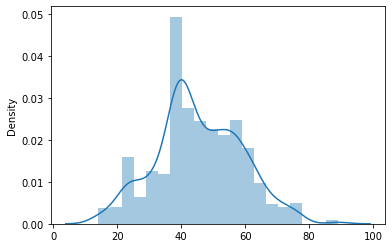

In [62]:
sns.distplot(x = df_churn1['AGE'])

In [63]:
df_upsample.columns

Index(['AGE', 'CUS_Month_Income', 'CUS_Gender', 'CUS_Marital_Status',
       'CUS_Customer_Since', 'YEARS_WITH_US', 'S1_total_debit_transactions',
       'S2_total_debit_transactions', 'S3_total_debit_transactions',
       'S1_total_debit', 'S2_total_debit', 'S3_total_debit',
       'S1_total_credit_transactions', 'S2_total_credit_transactions',
       'S3_total_credit_transactions', 'S1_total_credit', 'S2_total_credit',
       'S3_total_credit', 'total debit amount', 'total debit transactions',
       'total credit amount', 'total credit transactions',
       'total transactions', 'CUS_Target', 'TAR_Desc', 'Status', 'category',
       'Suggestions', 'S1_debit_usage', 'S2_debit_usage', 'S3_debit_usage',
       'S1_credit_usage', 'S2_credit_usage', 'S3_credit_usage',
       'S1_debit_rate', 'S2_debit_rate', 'S3_debit_rate', 'S1_credit_rate',
       'S2_credit_rate', 'S3_credit_rate'],
      dtype='object')

In [64]:
df_churn1

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,S1_total_debit_transactions,S2_total_debit_transactions,S3_total_debit_transactions,S1_total_debit,...,S3_debit_usage,S1_credit_usage,S2_credit_usage,S3_credit_usage,S1_debit_rate,S2_debit_rate,S3_debit_rate,S1_credit_rate,S2_credit_rate,S3_credit_rate
1015,69,500000.0,FEMALE,MARRIED,2005-09-21,14,0,0,0,0.00,...,0.00,26.32,42.11,31.58,0.00,0.00,0.00,26.32,42.11,31.58
1016,32,100000.0,MALE,SINGLE,2005-07-14,14,0,1,0,0.00,...,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00
1017,55,1500000.0,MALE,DIVORCE,2005-07-18,14,20,2,2,23800.00,...,1.33,100.00,0.00,0.00,83.33,8.33,8.33,100.00,0.00,0.00
1018,45,2500000.0,FEMALE,SINGLE,2005-07-14,14,4,0,0,1919.76,...,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00
1019,46,3000000.0,FEMALE,SINGLE,2005-08-10,14,0,0,1,0.00,...,100.00,0.00,0.00,100.00,0.00,0.00,100.00,0.00,0.00,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025,46,2000000.0,MALE,SINGLE,2005-07-19,14,19,0,0,44155.00,...,0.00,100.00,0.00,0.00,100.00,0.00,0.00,100.00,0.00,0.00
2026,52,2000.0,FEMALE,MARRIED,2005-11-25,14,0,0,1,0.00,...,100.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00
2027,53,10000000.0,MALE,SINGLE,2005-09-22,14,2,0,1,1817.02,...,32.71,0.00,100.00,0.00,66.67,0.00,33.33,0.00,100.00,0.00
2028,52,2000.0,FEMALE,MARRIED,2005-11-25,14,0,0,1,0.00,...,100.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00


<AxesSubplot:xlabel='YEARS_WITH_US', ylabel='Density'>

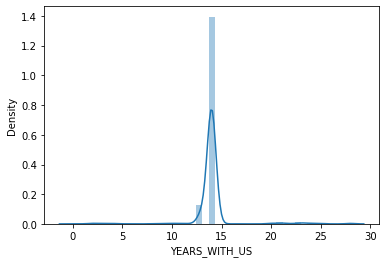

In [65]:
sns.distplot(df_upsample['YEARS_WITH_US'])

Text(0.5, 1.0, 'Debit Usage for Churning Customer')

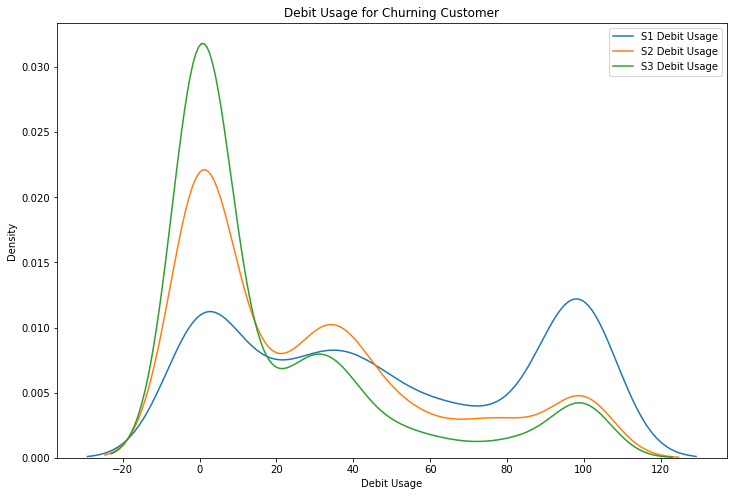

In [66]:
plt.figure(figsize=[12,8])

sns.kdeplot(df_churn1["S1_debit_usage"])
sns.kdeplot(df_churn1["S2_debit_usage"])
sns.kdeplot(df_churn1["S3_debit_usage"])

plt.legend(["S1 Debit Usage","S2 Debit Usage", "S3 Debit Usage"],loc='upper right')
plt.ylabel('Density')
plt.xlabel('Debit Usage')
plt.title('Debit Usage for Churning Customer')

Text(0.5, 1.0, 'Debit Transaction Rate for Churning Customer')

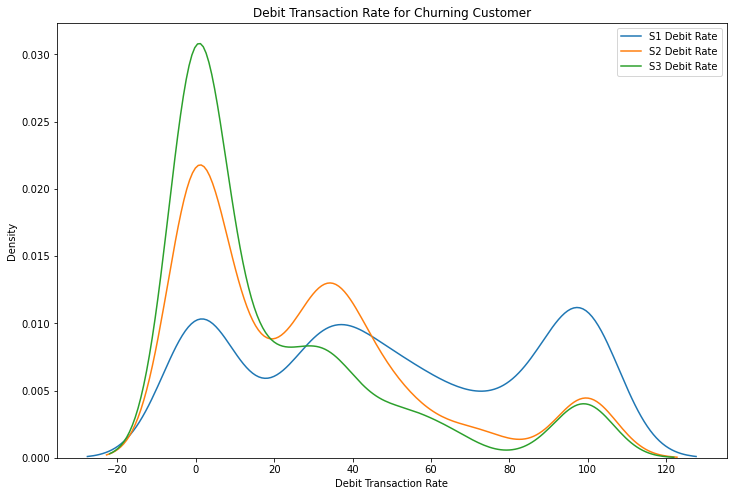

In [67]:
plt.figure(figsize=[12,8])

sns.kdeplot(df_churn1["S1_debit_rate"])
sns.kdeplot(df_churn1["S2_debit_rate"])
sns.kdeplot(df_churn1["S3_debit_rate"])

plt.legend(["S1 Debit Rate","S2 Debit Rate", "S3 Debit Rate"],loc='upper right')
plt.ylabel('Density')
plt.xlabel('Debit Transaction Rate')
plt.title('Debit Transaction Rate for Churning Customer')

Text(0.5, 1.0, 'Credit Usage for Churning Customer')

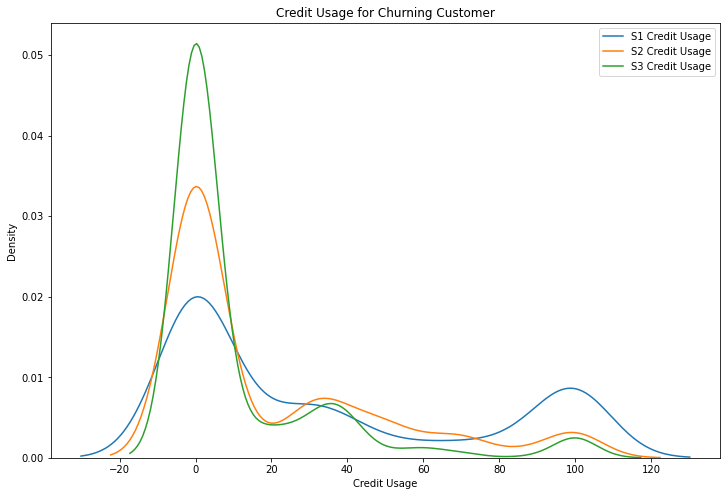

In [68]:
plt.figure(figsize=[12,8])

sns.kdeplot(df_churn1["S1_credit_usage"])
sns.kdeplot(df_churn1["S2_credit_usage"])
sns.kdeplot(df_churn1["S3_credit_usage"])

plt.legend(["S1 Credit Usage","S2 Credit Usage", "S3 Credit Usage"],loc='upper right')
plt.ylabel('Density')
plt.xlabel('Credit Usage')
plt.title('Credit Usage for Churning Customer')

Text(0.5, 1.0, 'Credit Transaction Rate for Churning Customer')

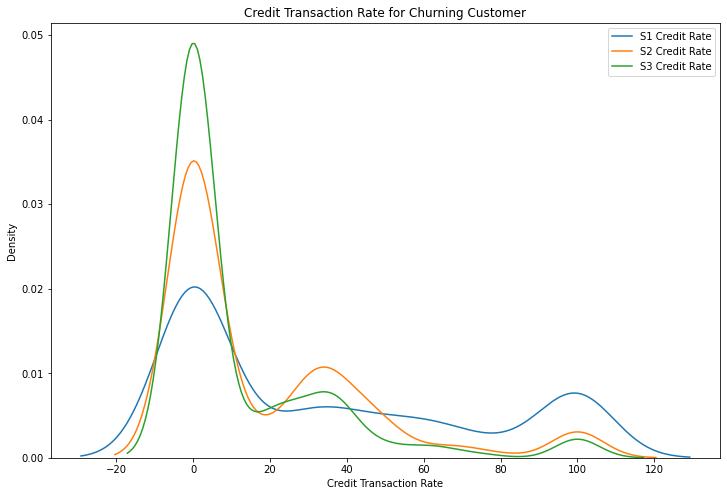

In [69]:
plt.figure(figsize=[12,8])

sns.kdeplot(df_churn1["S1_credit_rate"])
sns.kdeplot(df_churn1["S2_credit_rate"])
sns.kdeplot(df_churn1["S3_credit_rate"])

plt.legend(["S1 Credit Rate","S2 Credit Rate", "S3 Credit Rate"],loc='upper right')
plt.ylabel('Density')
plt.xlabel('Credit Transaction Rate')
plt.title('Credit Transaction Rate for Churning Customer')

<AxesSubplot:xlabel='TAR_Desc', ylabel='count'>

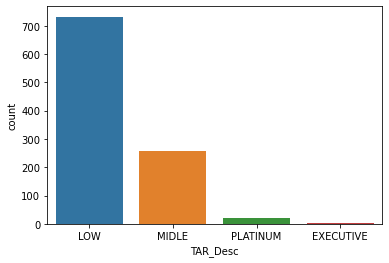

In [70]:
sns.countplot(x = df_churn1['TAR_Desc'])

<AxesSubplot:xlabel='TAR_Desc', ylabel='count'>

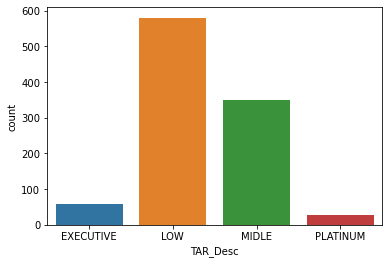

In [71]:
sns.countplot(x = df_churn0['TAR_Desc'])

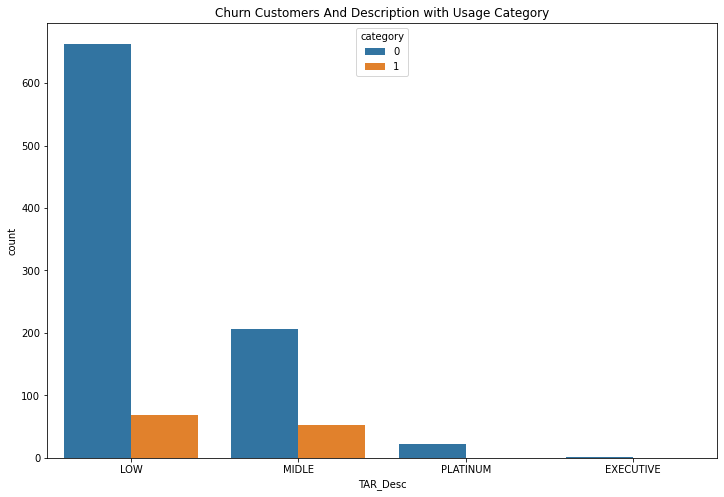

In [72]:
bi_analysis(df_churn1, 'TAR_Desc', 'Churn Customers And Description with Usage Category', hue = 'category')

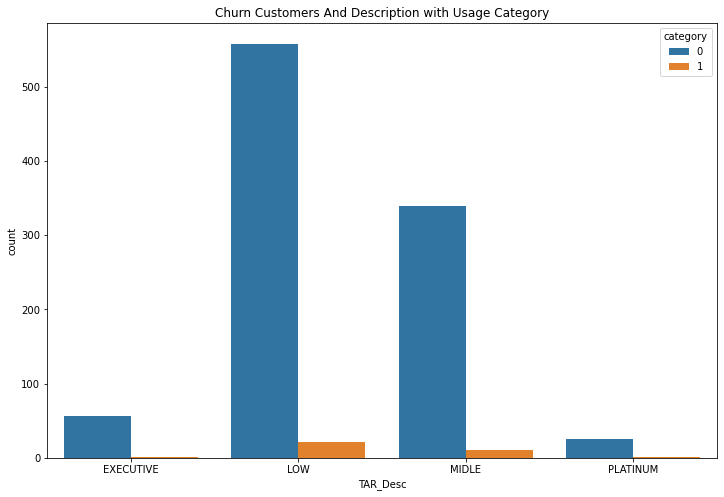

In [73]:
bi_analysis(df_churn0, 'TAR_Desc', 'Churn Customers And Description with Usage Category', hue = 'category')

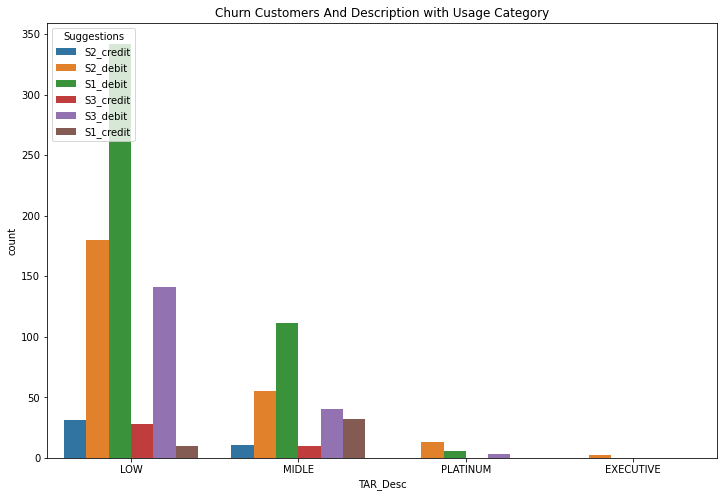

In [74]:
bi_analysis(df_churn1, 'TAR_Desc', 'Churn Customers And Description with Usage Category', hue = 'Suggestions')

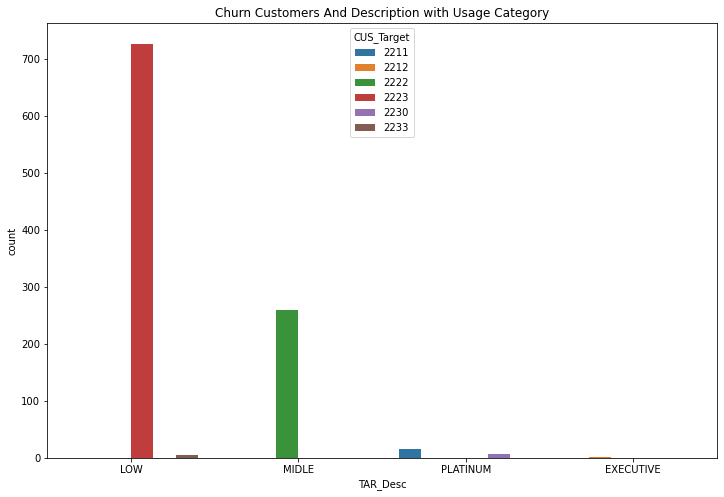

In [75]:
 bi_analysis(df_churn1, 'TAR_Desc', 'Churn Customers And Description with Usage Category', hue = 'CUS_Target')

In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
le = LabelEncoder()

In [78]:
df_upsample.columns

Index(['AGE', 'CUS_Month_Income', 'CUS_Gender', 'CUS_Marital_Status',
       'CUS_Customer_Since', 'YEARS_WITH_US', 'S1_total_debit_transactions',
       'S2_total_debit_transactions', 'S3_total_debit_transactions',
       'S1_total_debit', 'S2_total_debit', 'S3_total_debit',
       'S1_total_credit_transactions', 'S2_total_credit_transactions',
       'S3_total_credit_transactions', 'S1_total_credit', 'S2_total_credit',
       'S3_total_credit', 'total debit amount', 'total debit transactions',
       'total credit amount', 'total credit transactions',
       'total transactions', 'CUS_Target', 'TAR_Desc', 'Status', 'category',
       'Suggestions', 'S1_debit_usage', 'S2_debit_usage', 'S3_debit_usage',
       'S1_credit_usage', 'S2_credit_usage', 'S3_credit_usage',
       'S1_debit_rate', 'S2_debit_rate', 'S3_debit_rate', 'S1_credit_rate',
       'S2_credit_rate', 'S3_credit_rate'],
      dtype='object')

In [79]:
df_upsample['CUS_Gender'] = le.fit_transform(df_upsample['CUS_Gender'])

In [80]:
df_upsample['CUS_Marital_Status'] = le.fit_transform(df_upsample['CUS_Marital_Status'])

In [81]:
dict_new = {'PLATINUM':0, 'EXECUTIVE':1, 'MIDLE': 2, 'LOW': 3}
df_upsample.replace({'TAR_Desc': dict_new}, inplace=True)
df_upsample['TAR_Desc'].unique()

array([1, 3, 2, 0], dtype=int64)

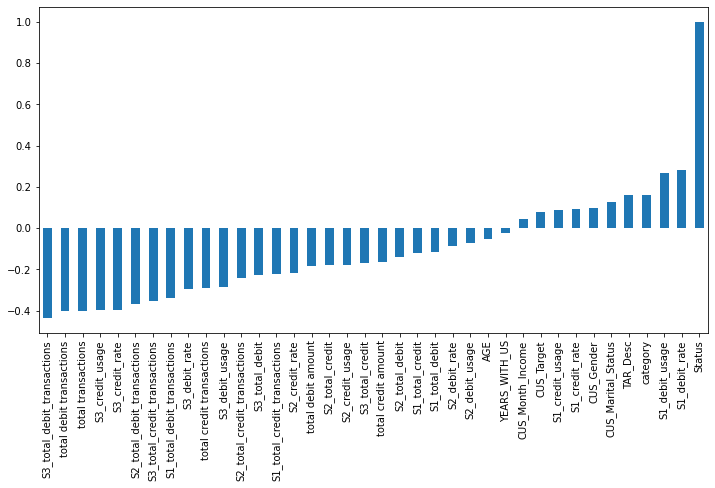

In [82]:
plt.figure(figsize = [12,6])
df_upsample.corr()['Status'].sort_values(ascending= True).plot(kind = 'bar')
plt.show()

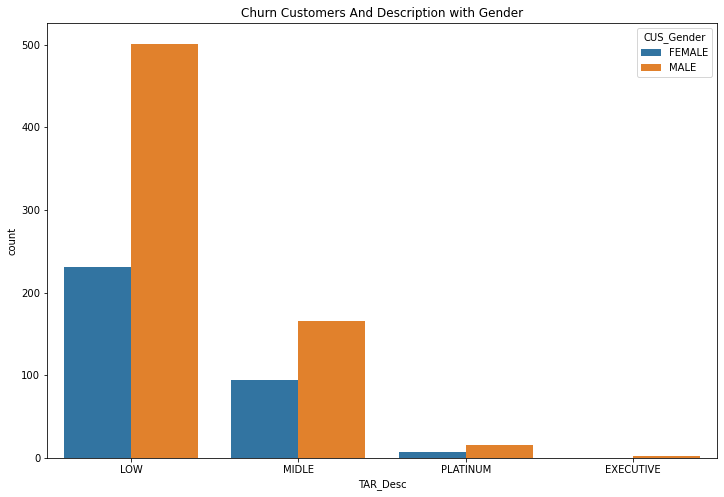

In [83]:
 bi_analysis(df_churn1, 'TAR_Desc', 'Churn Customers And Description with Gender', hue = 'CUS_Gender')

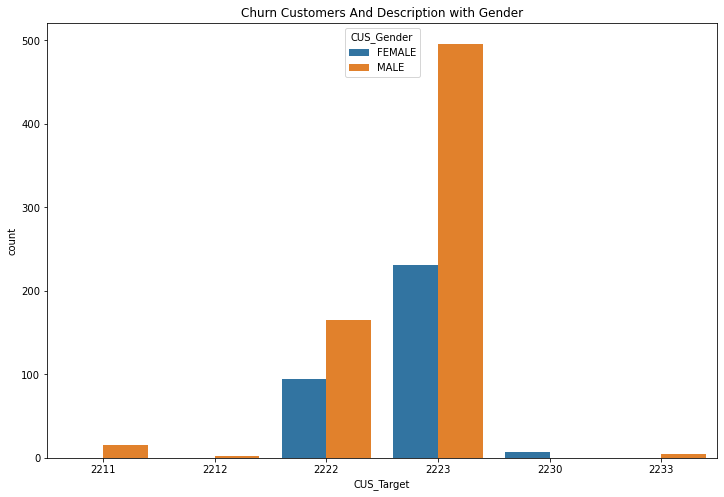

In [84]:
 bi_analysis(df_churn1, 'CUS_Target', 'Churn Customers And Description with Gender', hue = 'CUS_Gender')

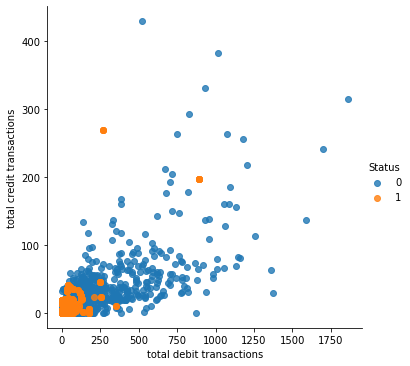

In [85]:
sns.lmplot(data=df_upsample, x='total debit transactions', y='total credit transactions', hue = 'Status', fit_reg=False)

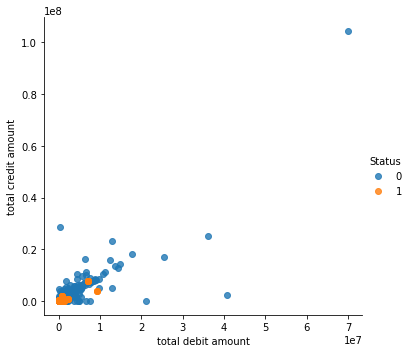

In [86]:
sns.lmplot(data=df_upsample, x='total debit amount', y='total credit amount', hue = 'Status', fit_reg=False)

In [87]:
df_final = df_upsample[['AGE', 'CUS_Month_Income', 'CUS_Gender', 'CUS_Marital_Status',
       'CUS_Customer_Since', 'YEARS_WITH_US','CUS_Target', 'TAR_Desc', 'Status', 'category',
       'Suggestions']]

In [88]:
dict_sug = {'S1_debit':0, 'S2_debit':1, 'S3_debit': 2, 'S1_credit':3, 'S2_credit':4, 'S3_credit': 5}
df_final.replace({'Suggestions': dict_sug}, inplace=True)
df_final['Suggestions'].unique()

array([2, 0, 3, 1, 4, 5], dtype=int64)

In [103]:
df_final.to_csv('Final_Churn.csv')

In [104]:
df_upsample

,AGE,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,...,S3_debit_usage,S1_credit_usage,S2_credit_usage,S3_credit_usage,S1_debit_rate,S2_debit_rate,S3_debit_rate,S1_credit_rate,S2_credit_rate,S3_credit_rate
0,49,1,1,25,4758311.63,887,5659653.33,65,952,2231,...,43.47,26.80,31.17,42.03,31.23,29.88,38.90,15.38,36.92,47.69
1,46,0,4,14,139363.22,97,87000.00,10,107,2223,...,60.17,11.49,22.41,66.09,38.14,15.46,46.39,20.00,40.00,40.00
2,53,0,4,14,37375.46,53,1020883.70,27,80,2222,...,11.64,69.51,23.54,6.95,58.49,26.42,15.09,51.85,29.63,18.52
3,15,0,4,14,4000.00,1,76946.96,12,13,2223,...,0.00,39.12,36.51,24.37,0.00,100.00,0.00,41.67,33.33,25.00
4,48,0,4,5,338470.29,60,442100.00,21,81,2223,...,13.70,44.24,39.81,15.95,25.00,55.00,20.00,38.10,33.33,28.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025,46,1,4,14,44155.00,19,8500.00,2,21,2223,...,0.00,100.00,0.00,0.00,100.00,0.00,0.00,100.00,0.00,0.00
2026,52,0,1,14,19.50,1,0.00,0,1,2223,...,100.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00
2027,53,1,4,14,2700.34,3,1000.00,1,4,2222,...,32.71,0.00,100.00,0.00,66.67,0.00,33.33,0.00,100.00,0.00
2028,52,0,1,14,19.50,1,0.00,0,1,2223,...,100.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00


In [90]:
df_upsample['CUS_Month_Income'].max()

80000000.0

In [91]:
df_upsample.drop(columns = ['CUS_Month_Income', 'CUS_Customer_Since','S1_total_debit_transactions',
       'S2_total_debit_transactions', 'S3_total_debit_transactions',
       'S1_total_debit', 'S2_total_debit', 'S3_total_debit',
       'S1_total_credit_transactions', 'S2_total_credit_transactions',
       'S3_total_credit_transactions', 'S1_total_credit', 'S2_total_credit',
       'S3_total_credit'], inplace = True)

In [92]:
df_upsample

,AGE,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,...,S3_debit_usage,S1_credit_usage,S2_credit_usage,S3_credit_usage,S1_debit_rate,S2_debit_rate,S3_debit_rate,S1_credit_rate,S2_credit_rate,S3_credit_rate
0,49,1,1,25,4758311.63,887,5659653.33,65,952,2231,...,43.47,26.80,31.17,42.03,31.23,29.88,38.90,15.38,36.92,47.69
1,46,0,4,14,139363.22,97,87000.00,10,107,2223,...,60.17,11.49,22.41,66.09,38.14,15.46,46.39,20.00,40.00,40.00
2,53,0,4,14,37375.46,53,1020883.70,27,80,2222,...,11.64,69.51,23.54,6.95,58.49,26.42,15.09,51.85,29.63,18.52
3,15,0,4,14,4000.00,1,76946.96,12,13,2223,...,0.00,39.12,36.51,24.37,0.00,100.00,0.00,41.67,33.33,25.00
4,48,0,4,5,338470.29,60,442100.00,21,81,2223,...,13.70,44.24,39.81,15.95,25.00,55.00,20.00,38.10,33.33,28.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025,46,1,4,14,44155.00,19,8500.00,2,21,2223,...,0.00,100.00,0.00,0.00,100.00,0.00,0.00,100.00,0.00,0.00
2026,52,0,1,14,19.50,1,0.00,0,1,2223,...,100.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00
2027,53,1,4,14,2700.34,3,1000.00,1,4,2222,...,32.71,0.00,100.00,0.00,66.67,0.00,33.33,0.00,100.00,0.00
2028,52,0,1,14,19.50,1,0.00,0,1,2223,...,100.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00


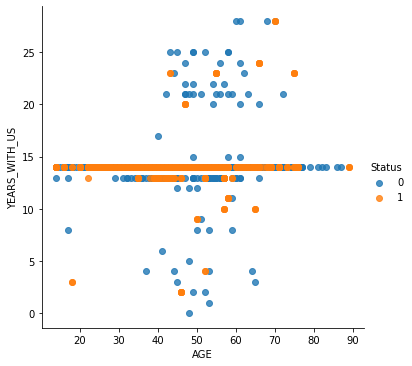

In [93]:
sns.lmplot(data=df_upsample, x='AGE', y='YEARS_WITH_US', hue = 'Status', fit_reg=False)

In [94]:
df

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,S1_total_debit_transactions,S2_total_debit_transactions,S3_total_debit_transactions,S1_total_debit,...,S2_total_credit,S3_total_credit,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,345,1459126.64,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,45,35372.55,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,8,28248.85,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,0,0.00,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,12,69083.38,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,68,4500.00,MALE,SINGLE,2005-07-25,14,13,12,1,3069.60,...,0.00,0.00,5645.60,26,0.00,0,26,2223,LOW,CHURN
1245,35,3500000.00,MALE,SINGLE,2005-07-27,14,55,35,37,119297.02,...,119137.62,440891.65,385735.90,127,674630.41,22,149,2222,MIDLE,ACTIVE
1246,34,1000.00,MALE,SINGLE,2005-07-25,14,415,368,424,1068684.72,...,733658.65,971555.27,2473621.68,1207,2641348.01,217,1424,2232,MIDLE,ACTIVE
1247,69,2000000.00,MALE,SINGLE,2005-07-26,14,147,202,234,397602.73,...,532708.75,400814.60,1371852.22,583,1310768.35,48,631,2222,MIDLE,ACTIVE


In [95]:
df.drop(columns = ['CUS_Customer_Since'], inplace= True)

In [96]:
df

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,S1_total_debit_transactions,S2_total_debit_transactions,S3_total_debit_transactions,S1_total_debit,S2_total_debit,...,S2_total_credit,S3_total_credit,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,49,7116.64,MALE,MARRIED,25,277,265,345,1459126.64,1230543.08,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,46,1500000.00,FEMALE,SINGLE,14,37,15,45,35372.55,20134.00,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,53,5000000.00,FEMALE,SINGLE,14,31,14,8,28248.85,4777.66,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,15,500.00,FEMALE,SINGLE,14,0,1,0,0.00,4000.00,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,48,9000000.00,FEMALE,SINGLE,5,15,33,12,69083.38,223007.51,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,68,4500.00,MALE,SINGLE,14,13,12,1,3069.60,2376.00,...,0.00,0.00,5645.60,26,0.00,0,26,2223,LOW,CHURN
1245,35,3500000.00,MALE,SINGLE,14,55,35,37,119297.02,118884.00,...,119137.62,440891.65,385735.90,127,674630.41,22,149,2222,MIDLE,ACTIVE
1246,34,1000.00,MALE,SINGLE,14,415,368,424,1068684.72,571814.89,...,733658.65,971555.27,2473621.68,1207,2641348.01,217,1424,2232,MIDLE,ACTIVE
1247,69,2000000.00,MALE,SINGLE,14,147,202,234,397602.73,514584.25,...,532708.75,400814.60,1371852.22,583,1310768.35,48,631,2222,MIDLE,ACTIVE


In [97]:
df['CUS_Gender'] = le.fit_transform(df['CUS_Gender'])
df['CUS_Marital_Status'] = le.fit_transform(df['CUS_Marital_Status'])

In [98]:
dict_new = {'PLATINUM':0, 'EXECUTIVE':1, 'MIDLE': 2, 'LOW': 3}
df.replace({'TAR_Desc': dict_new}, inplace=True)
df['TAR_Desc'].unique()

array([1, 3, 2, 0], dtype=int64)

In [99]:
df.to_csv("New_Churn.csv")

In [100]:
df_churn1.groupby(['Status','CUS_Gender','CUS_Marital_Status'] ).mean()

AGE  CUS_Month_Income  \
Status CUS_Gender CUS_Marital_Status                                
1      FEMALE     MARRIED             55.362319      1.591396e+06   
                  SINGLE              38.757812      3.896988e+06   
                  WIDOWED             63.000000      4.000000e+06   
       MALE       DIVORCE             60.000000      1.003333e+06   
                  MARRIED             58.314050      4.797184e+06   
                  SINGLE              44.043400      2.955424e+06   

                                      YEARS_WITH_US  \
Status CUS_Gender CUS_Marital_Status                  
1      FEMALE     MARRIED                 15.043478   
                  SINGLE                  13.824219   
                  WIDOWED                 14.000000   
       MALE       DIVORCE                 18.666667   
                  MARRIED                 14.231405   
                  SINGLE                  13.772152   

                                      S1_total_debit_transactions  \
Status CUS_Gender CUS_Marital_Status                                
1      FEMALE     MARRIED                               16.391304   
                  SINGLE                                20.855469   
                  WIDOWED                                0.000000   
       MALE       DIVORCE                               14.333333   
                  MARRIED                                9.752066   
                  SINGLE                                15.092224   

                                      S2_total_debit_transactions  \
Status CUS_Gender CUS_Marital_Status                                
1      FEMALE     MARRIED                               14.043478   
                  SINGLE                                19.804688   
                  WIDOWED                                2.000000   
       MALE       DIVORCE                                1.333333   
                  MARRIED                                6.570248   
                  SINGLE                                11.010850   

                                      S3_total_debit_transactions  \
Status CUS_Gender CUS_Marital_Status                                
1      FEMALE     MARRIED                                3.434783   
                  SINGLE                                 8.882812   
                  WIDOWED                                3.000000   
       MALE       DIVORCE                                2.666667   
                  MARRIED                                3.611570   
                  SINGLE                                 6.468354   

                                      S1_total_debit  S2_total_debit  \
Status CUS_Gender CUS_Marital_Status                                   
1      FEMALE     MARRIED               43909.704493    37230.676087   
                  SINGLE                89280.206953   158082.442188   
                  WIDOWED                   0.000000     1304.380000   
       MALE       DIVORCE               16778.126667     1413.333333   
                  MARRIED               19802.732975    20965.700248   
                  SINGLE                94293.782550    43646.425154   

                                      S3_total_debit  \
Status CUS_Gender CUS_Marital_Status                   
1      FEMALE     MARRIED               17629.725217   
                  SINGLE                30050.746055   
                  WIDOWED                6749.700000   
       MALE       DIVORCE                4123.900000   
                  MARRIED                7269.001322   
                  SINGLE                33368.928336   

                                      S1_total_credit_transactions  ...  \
Status CUS_Gender CUS_Marital_Status                                ...   
1      FEMALE     MARRIED                                 4.579710  ...   
                  SINGLE                                  3.800781  ...   
                  WIDOWED                                 0.00000

In [101]:
df_upsample.columns

Index(['AGE', 'CUS_Gender', 'CUS_Marital_Status', 'YEARS_WITH_US',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'CUS_Target',
       'TAR_Desc', 'Status', 'category', 'Suggestions', 'S1_debit_usage',
       'S2_debit_usage', 'S3_debit_usage', 'S1_credit_usage',
       'S2_credit_usage', 'S3_credit_usage', 'S1_debit_rate', 'S2_debit_rate',
       'S3_debit_rate', 'S1_credit_rate', 'S2_credit_rate', 'S3_credit_rate'],
      dtype='object')